In [1]:
#!/usr/bin/env python                                                                       
'''
24/01/04

Debug buoyancy budget with RREXNUM


'''                                                                                         
######################
#import useful modules
######################

%load_ext memory_profiler

import os,sys

####################

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *
from Modules_gula import *

import matplotlib.colors as colors

%matplotlib inline
####################

no amg module


## Work on a zoom

In [2]:
####

# PICK TIME
#mean = 'mean.00010-000179'
#mean = 'mean.00005-00014'
#mean = 'mean.00020-00039'
#mean = 'mean.00010-00049'
mean = 'mean.00010-00069'
mean = 'mean.00010-000229'

year=0; time_his=20; time_diag=time_his; time_avg=int(time_his/2); section_lat = False

#mysimul = 'plain_master'; year=0; time_his=234; time_diag=time_his; time_avg=int(time_his/2); section_lat = True
#mysimul = 'gulfstream_diagnostics_tracer_230419'; year=0; time_his = 2; time_diag=time_his-1; time_avg=time_his-1; section_lat = True
mysimul = 'rrexnum100_RSUP5_NOFILT_notides_avg_' + mean; year=0; time_his=10; time_diag=time_his; time_avg=int(time_his/2); section_lat = False
#mysimul = 'rrexnum200_RSUP5_FILT1h'; year=0; time_his=21; time_diag=time_his-1; time_avg=int(time_his/2); section_lat = False

mysimul = 'rrexnum200_RSUP5_FILT1h_avg_' + mean ; 
mysimul = 'rrexnumsb200_RSUP5_NOFILT_avg_' + mean; 
#mysimul = 'rrexnums200_RSUP5_NOFILT_avg_' + mean; 

####################################

simul0 = load(mysimul,time=time_his,output=True)
#simul0_wdia = load(simul0.simul + '_wdia',time=time_his,output=False)

####################################
if mysimul == 'rrexnum100_UP3':
    title = 'UP3'
elif mysimul == 'rrexnum100':
    title = 'RSUP3'
else:
    title = mysimul
    
#print('simul avg oceantime', simul_avg.oceantime)
####################################

fifig = './Figures/' 

####

#zoom = [-30, 0, -40, -10]; domain = 'domain0'; zoomed = True;
#zoom = [-100, 20, -60, 70]; domain = 'all'; zoomed = False
#zoom = [-19, -5, -14, 0]; domain = 'plain';

zoom = [simul0.x.min(), simul0.x.max(), simul0.y.min(), simul0.y.max()]; domain = 'all';

#######

lon1,lat1 = zoom[0], zoom[2]
lon2,lat2 = zoom[1], zoom[3]

# Only load area around the section
ix1,iy1 = tools.find_nearest_points(simul0.x,simul0.y,lon1,lat1)
ix2,iy2 = tools.find_nearest_points(simul0.x,simul0.y,lon1,lat2)
ix3,iy3 = tools.find_nearest_points(simul0.x,simul0.y,lon2,lat1)
ix4,iy4 = tools.find_nearest_points(simul0.x,simul0.y,lon2,lat2)
ixs = [ix1,ix2,ix3,ix4]
iys = [iy1,iy2,iy3,iy4]

#######

i_sec = 500 #- 200#+300
dx_sec = 400;

j_sec = 350 #- 200#+300
dy_sec = 200; 

coordinates= ' [' + format(np.max([j_sec-dy_sec,0])) + ','\
              + format(j_sec+dy_sec) + ','\
              + format(np.max([i_sec-dx_sec,0])) + ','\
              + format(i_sec+dx_sec) + ',[1,300,1]] '


####

%memit simul = simul_zoom = load(simul = simul0.simul +\
               coordinates +format(simul0.time),output=False)
[y1,y2,x1,x2]=simul_zoom.coord[0:4]

print([y1,y2,x1,x2])

############################################################


simulname is rrexnumsb200_RSUP5_NOFILT_avg_mean.00010-000229
args (['rrexnumsb200_RSUP5_NOFILT_avg_mean.00010-000229'],)
args[0] ['rrexnumsb200_RSUP5_NOFILT_avg_mean.00010-000229']
len(args[0]) 1
time of simulation is: 10
file opened in oceandate
file closed in oceandate
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/RREXNUM/rrexnums_grd.nc
file opened in get_domain
get domain [0,10000,0,10000,[1,1000,1]] [0,10
file opened in get_domain
file closed in get_domain
file closed in get_domain
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/RREXNUM/rrexnums_grd.nc
file opened in get_domain
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
file opened in get_domain
file closed in get_domain
file closed in get_domain
cst
file opened in cst
read Cs_r in ncfile.Cs_r
file closed in cst
dt
file opened in dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/RREXNUM/RREXNUMSB200_RSUP5_NOFILT/HIS//rrexnum200_avg.mean.00010-000229.nc
file closed in dt
[0, 802, 0, 1002, ar

In [3]:
############################################################
# Files we need:

simul_wdia = load(simul = simul.simul + '_wdia' + \
             coordinates +format(time_diag),output=False)

meanfile_avg = simul_zoom.ncfile
meanfile_wdia = simul_wdia.ncfile

#################

print(simul_zoom.ncfile)
print('simul his oceantime', simul0.oceantime)
print(simul_wdia.ncfile)
print('simul wdia oceantime', simul_wdia.oceantime)

#################

try:
    simul_ts = load(simul = simul.simul + '_ts' + \
                 coordinates +format(time_diag),output=False)
    meanfile_ts = simul_ts.ncfile
    print('simul ts oceantime', simul_ts.oceantime)
except:
    print('no TS file')


/net/libra/local/tmp/1//gula/ROMS/Simulations/RREXNUM/RREXNUMSB200_RSUP5_NOFILT/HIS//rrexnum200_avg.mean.00010-000229.nc
simul his oceantime 946081833
/net/libra/local/tmp/1//gula/ROMS/Simulations/RREXNUM/RREXNUMSB200_RSUP5_NOFILT/HIS//rrexnum200_diags_wdia_avg.mean.00010-000229.nc
simul wdia oceantime 946081833
simul ts oceantime 946081833


## Plot the domain

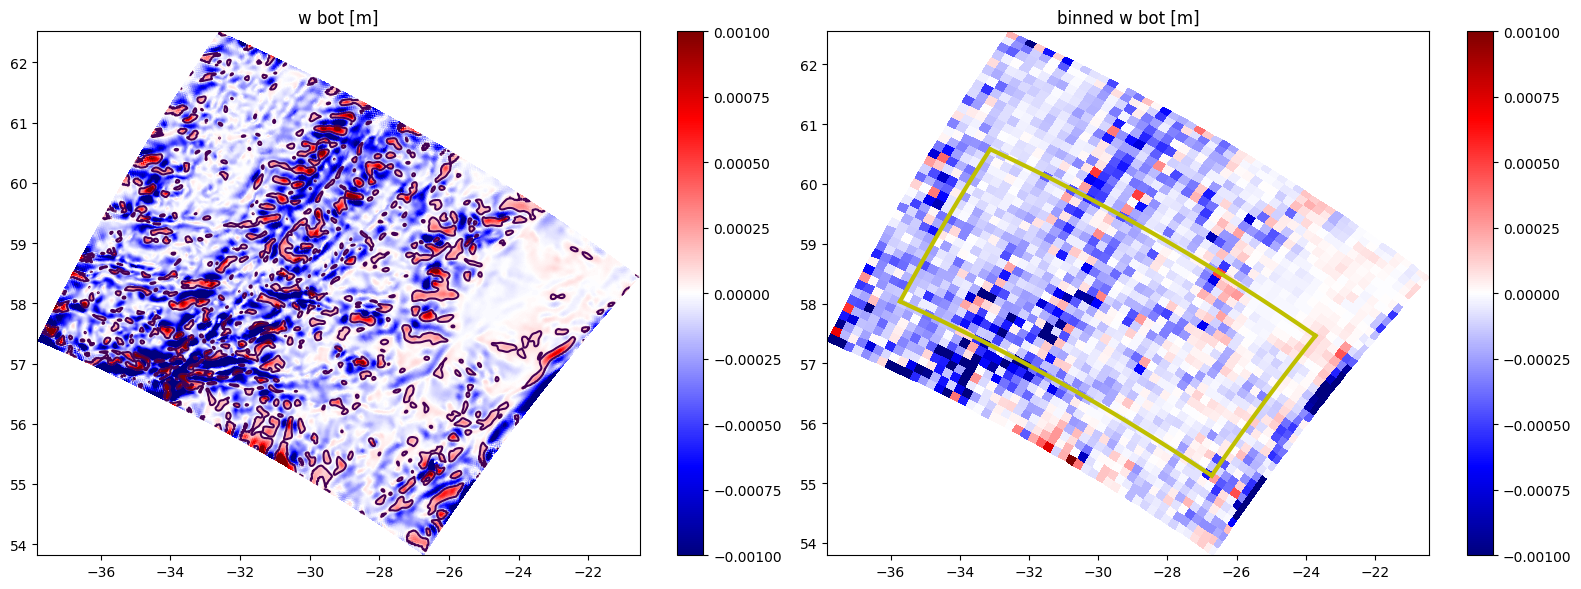

In [4]:

#simul = load(simul = simul.simul +format(simul.time),output=False)

wbot = var('w', simul0).data[:,:,0]


############################

fig = plt.figure(figsize=(16.0,6.0))
fig.set_tight_layout(1.)

###################

nbin = 20

####

my_cmap= plot.ncview_colormap('blue_red')

ax1 = plt.subplot(1,2,1);
plt.pcolormesh(simul0.x,simul0.y,\
               wbot,\
               vmin=-1e-3,vmax=1e-3,cmap=my_cmap); plt.colorbar()

plt.contour(simul0.x,simul0.y,wbot,[1e-4])


plt.title('w bot [m]')

ax1 = plt.subplot(1,2,2);
plt.pcolormesh(sm.moy_h(simul0.x,nbin),sm.moy_h(simul0.y,nbin),\
               sm.moy_h(wbot,nbin),\
               vmin=-1e-3,vmax=1e-3,cmap=my_cmap);
plt.colorbar()
plt.title('binned w bot [m]')


####

domaincolor = 'y'
domainalpha = 1.
plt.plot(simul_zoom.x[-1,:], simul_zoom.y[-1,:], color=domaincolor,alpha=domainalpha, linewidth=3)
plt.plot(simul_zoom.x[:,0], simul_zoom.y[:,0], color=domaincolor,alpha=domainalpha, linewidth=3)
plt.plot(simul_zoom.x[0,:], simul_zoom.y[0,:], color=domaincolor,alpha=domainalpha, linewidth=3)
plt.plot(simul_zoom.x[:,-1], simul_zoom.y[:,-1], color=domaincolor,alpha=domainalpha, linewidth=3)

####



# plot a vertical section of HRS

In [6]:
### Coordinates for vertical sections
############


def section(var, avg = True):
    if section_lat:
        if len(var.shape)==4:
            if not avg:
                return var[ix,:,:,-1]
            else:
                return np.nanmean(var[1:-1,:,:,-1],axis=0);
        elif len(var.shape)==3:
            if not avg:
                return var[ix,:,:]
            else:
                return np.nanmean(var[1:-1,:,:],axis=0);
        elif len(var.shape)==2:
            if not avg:
                return var[ix,:]
            else:
                return np.nanmean(var[1:-1,:],axis=0);
    else:
        if len(var.shape)==4:
            if not avg:
                return var[:,iy,:,-1]
            else:
                return np.nanmean(var[:,1:-1,:,-1],axis=1);
        elif len(var.shape)==3:
            if not avg:
                return var[:,iy,:]
            else:
                return np.nanmean(var[:,1:-1,:],axis=1);
        elif len(var.shape)==2:
            if not avg:
                return var[:,iy]
            else:
                return np.nanmean(var[:,1:-1],axis=1);
        
        


############


ix=10; iy=10


dab=False

if dab:
    figname = 'dab'
else:
    figname = 'depth'

%memit [z_r,z_w] = tools.get_depths(simul_zoom); 

%memit z_r_sec_x = section(z_r[:,:,:]); del z_r
%memit z_w_sec_x = section(z_w[:,:,:]); del z_w

if dab:
    z_r_sec_x = (z_r_sec_x.T - z_w_sec_x[:,0].T ).T
    z_w_sec_x = (z_w_sec_x.T - z_w_sec_x[:,0].T ).T

#z_r_sec_x = (z_r_sec_x.T - z_r_sec_x[:,0].T ).T # check that it looks like dab!
dx=50

####

%memit rho_sec_x =  section(var('rho1',simul_zoom).data) + simul_zoom.rho0 - 1000.
#rho_sec_y =  section(var('rho1',simul).data[:,j_sec-dy:j_sec+dy,:],axis=1) + simul.rho0 - 1000.

%memit hbbl_sec_x  =  section(var('hbbl',simul_zoom).data) 

if section_lat:
    %memit lat1d =  section(simul_zoom.y)
else:
    %memit lat1d =  section(simul_zoom.x)

%memit lat_sec_x = np.tile(lat1d, (z_r_sec_x.shape[1],1)).T
%memit lat_sec_xw = np.tile(lat1d, (z_w_sec_x.shape[1],1)).T


print(z_w_sec_x.shape,lat_sec_x.shape)

####

def panel(ax, myvar,levels,title=' ',grid='r', varname =' ', varlabel=' ', low=1e-6, xlim = None, zlim=None, my_cmap=None, myvar2=None):
    
    if my_cmap is None:
        my_cmap= plot.ncview_colormap('blue_red')
        
    sigs = np.array([26.4, 27.0, 27.1, 27.2, 27.3, 27.35,\
                     27.4, 27.45, 27.5, 27.6, 27.7, 27.8, 27.9]) # for plotting isopycnals

    if varname =='AKt':
        plt.pcolormesh(lat_sec_xw, z_w_sec_x,\
                        myvar,\
                        cmap =plot.ncview_colormap('jaisnb'),\
                        norm=colors.LogNorm(vmin=1e-5, vmax=1e-0));
        
    elif varname =='wdia':
        plt.pcolormesh(lat_sec_x, z_r_sec_x,\
                        myvar,\
                        cmap =plot.ncview_colormap('blu_red'),\
                        norm=colors.SymLogNorm(linthresh=low, linscale=0.5,\
                                               vmin=levels.min(), vmax=levels.max()))
        
    else:
        if grid=='r':
            plt.pcolormesh(lat_sec_x, z_r_sec_x,\
                            myvar,\
                            vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True);
        else:
            plt.pcolormesh(lat_sec_xw, z_w_sec_x,\
                            myvar,\
                            vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True); 
    plt.colorbar()
    
    if xlim is not None: plt.xlim(xlim)
    if zlim is not None: plt.ylim(zlim)
    
    #plt.xlim([40,50]); plt.ylim([-500, 0])
    
    CS2 = plt.contour(lat_sec_x, z_r_sec_x,
                    rho_sec_x,sigs,colors = ('k',), linewidths = (0.8,));
    plt.clabel(CS2, fmt = '%1.2f', colors = 'k', fontsize=6)  ;
    
    if dab:
        CS3 = plt.plot(lat_sec_x, hbbl_sec_x,'y',linewidth=1)
    else:
        CS3 = plt.plot(lat_sec_x, -hbbl_sec_x,'y',linewidth=1)
    
    #ax1.xaxis.set_major_formatter( NullFormatter() )
    
    if dab:
        plt.ylabel(r'dab [m]',fontsize=18);  plt.ylim([0 , 500]);  
    else:
        plt.ylabel(r'z [m]',fontsize=18);  #plt.ylim([-4000, -1000]);
        
    plt.title(title, fontsize=20)
    
    if varlabel!=' ': 
        color = 'w'; box = 'round,pad=0.15'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=0.5)
        ax.text(0.9,0.9,varlabel, fontsize=20,\
                              horizontalalignment='right', verticalalignment='center',\
                              bbox=props, transform=ax.transAxes)


    ##




peak memory: 2601.52 MiB, increment: 983.04 MiB
peak memory: 3209.03 MiB, increment: 607.31 MiB
peak memory: 2723.78 MiB, increment: 610.34 MiB
peak memory: 2714.44 MiB, increment: 1091.73 MiB
peak memory: 1626.78 MiB, increment: 7.88 MiB
peak memory: 1626.78 MiB, increment: 0.00 MiB
peak memory: 1626.78 MiB, increment: 0.00 MiB
peak memory: 1626.79 MiB, increment: 0.01 MiB
(800, 201) (800, 200)


In [7]:
############################################
def u2rho(var_u):
    
    [M,Lp,N]=var_u.shape
    Mp=M+1
    Mm=M-1
    var_rho=np.zeros((Mp,Lp,N))
    var_rho[1:M,:,:]= np.where( var_u[0:Mm,:]*var_u[1:M,:,:]>0. , 2.*(var_u[0:Mm,:]*var_u[1:M,:,:])/(var_u[0:Mm,:]+var_u[1:M,:,:]), 0.)
    var_rho[0,:,:]=var_rho[1,:,:]
    var_rho[Mp-1,:,:]=var_rho[M-1,:,:]
    
    return var_rho

############################################
def v2rho(var_v):
    
    [Mp,L,N]=var_v.shape
    Lp=L+1
    Lm=L-1
    var_rho=np.zeros((Mp,Lp,N))
    var_rho[:,1:L,:]=np.where( var_v[:,0:Lm,:]*var_v[:,1:L,:]>0. , 2.*(var_v[:,0:Lm,:]*var_v[:,1:L,:])/(var_v[:,0:Lm,:]+var_v[:,1:L,:]), 0.)
    var_rho[:,0,:]=var_rho[:,1,:]
    var_rho[:,Lp-1,:]=var_rho[:,L-1,:]
    return var_rho

    return var_rho

############################################
def w2rho(var_w):
    
    [M,L,N]=var_w.shape
    var_rho  =np.where( var_w[:,:,1:]*var_w[:,:,:-1]>0. , 2.*(var_w[:,:,1:]*var_w[:,:,:-1])/(var_w[:,:,1:]+var_w[:,:,:-1]) , 0.)

    return var_rho

############################################
def rho2w(var_rho,harmo=False):
    
    
    [M,L,N]=var_rho.shape
    var_w=np.zeros((M,L,N+2))
    
    var_w[:,:,0] = var_rho[:,:,0]
    var_w[:,:,-1] = var_rho[:,:,-1]
    var_w[:,:,1:-1] = var_rho
    
    if harmo:
        return w2rho(var_w)
    else:
        return 0.5* (var_w[:,:,1:] + var_w[:,:,:-1])
    
   ############################################ 

# Test diffusivity

/tmp/ipykernel_890923/1901541982.py:110: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\
/tmp/ipykernel_890923/1901541982.py:102: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\


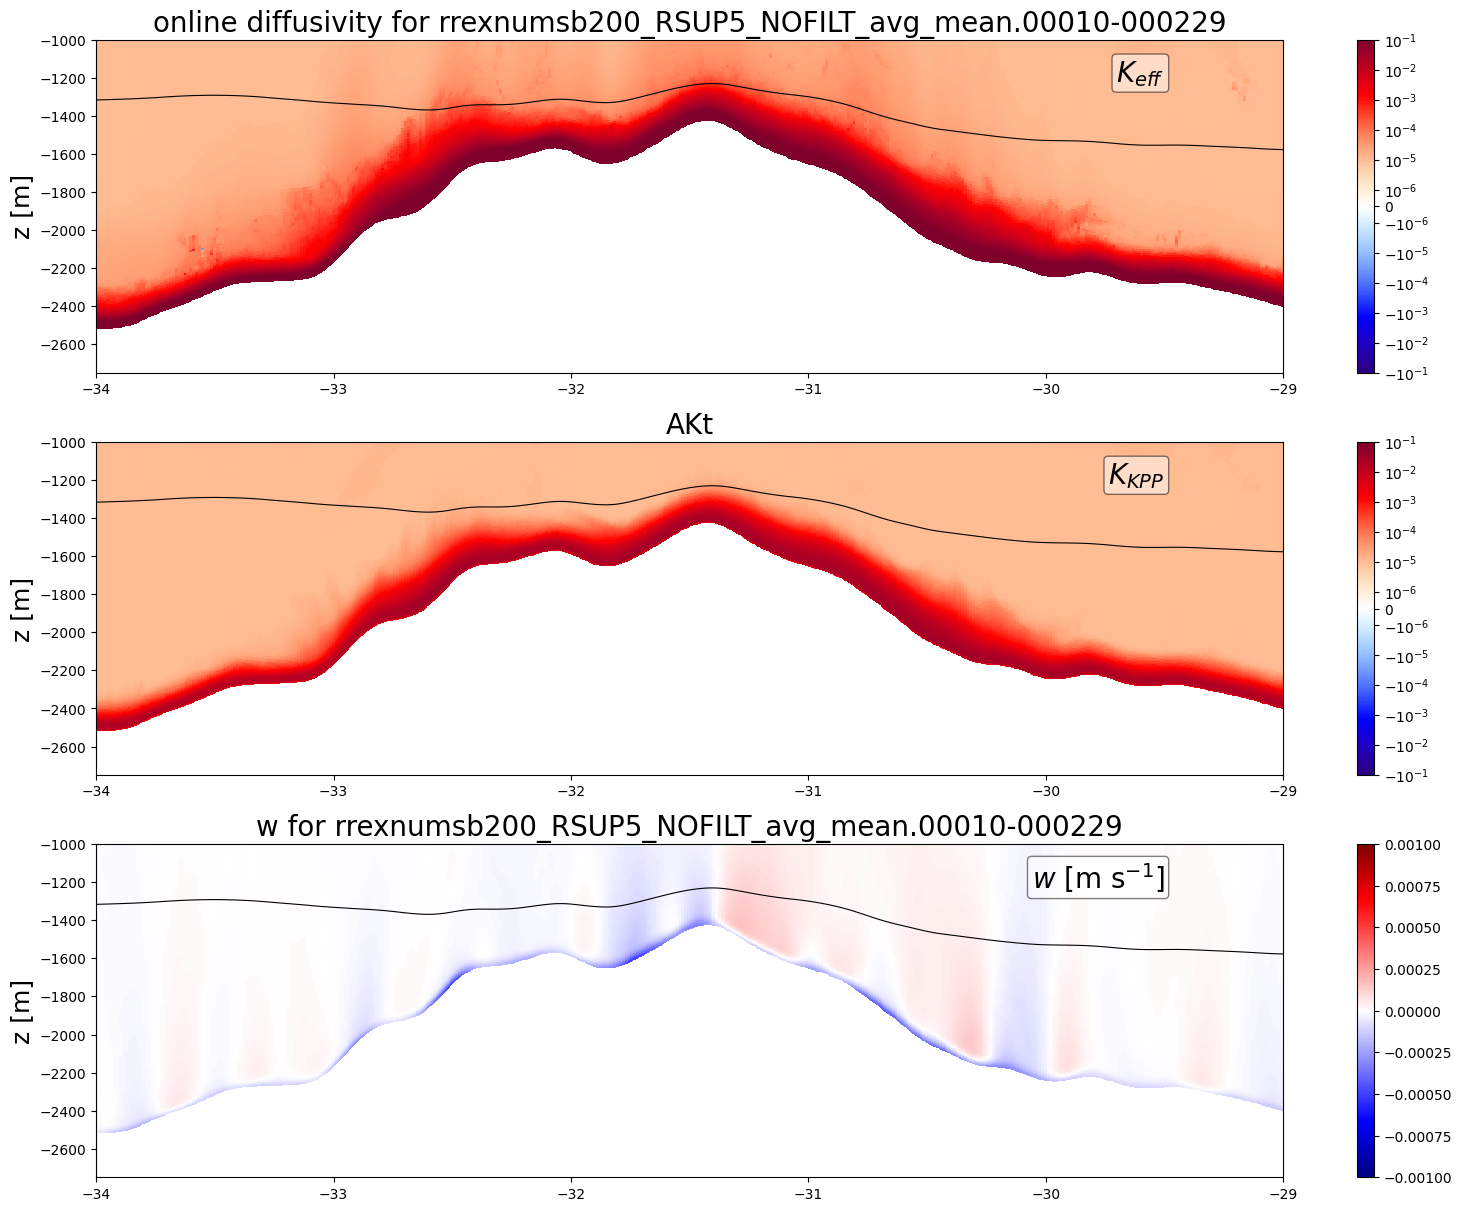

In [8]:
# Get variables and plot sections

######################

diffusivity_online = section(var('diffusivity',simul_wdia).data)
AKt = section(rho2w(var('AKt',simul).data))[:,1:-1]
w_online =  section(var('w',simul).data)



######################

zoom = True
if zoom: 
    xlim = [-34, -29]
    zlim = [-2750,-1000]
else:
    xlim = None
    zlim = None
    
    
wdia_scale = np.arange(-1,1.01,0.01)*1e-1
scale = 1e-1

############################

fig = plt.figure(figsize=(16.0,16.0))
fig.set_tight_layout(1.)

###################
'''
ax1 = plt.subplot(4,1,4);
panel(ax1,wdia_online,levels=wdia_scale,\
      title='w dia for '+ title, varname ='wdia',varlabel=r'$w_{dia}$ [s$^{-1}$]',xlim=xlim, zlim=zlim,low=1e-5)
'''

###################

ax1 = plt.subplot(4,1,3);
panel(ax1,w_online,levels=np.linspace(-1e-3, 1e-3,10),\
      title='w for '+ title, varname ='w',varlabel=r'$w$ [m s$^{-1}$]',xlim=xlim, zlim=zlim)


#plt.ylim([-4000,-3000])
###################

ax1 = plt.subplot(4,1,1);
panel(ax1,diffusivity_online,levels=np.arange(-1,1.01,0.01)*scale,\
      title='online diffusivity for '+ title, varname ='wdia',varlabel=r'$K_{eff}$',xlim=xlim, zlim=zlim,low=1e-6)

#plt.ylim([-4000,-3000])
###################

ax1 = plt.subplot(4,1,2);
panel(ax1,AKt,levels=np.arange(-1,1.01,0.01)*scale,\
      title='AKt', varname ='wdia',varlabel=r'$K_{KPP}$',xlim=xlim, zlim=zlim,low=1e-6)
#plt.ylim([-4000,-3000])

############################


#py.savefig(fifig + 'mixing_and_wdia' +simul.simul + '.png', dpi=200,bbox_inches='tight');


# Load buoyancy terms

In [9]:

b_rate =  section(var('b_rate',simul_wdia).data)
b_adv =  section(var('b_adv',simul_wdia).data)
b_rhs =  section(var('b_rhs',simul_wdia).data)


/tmp/ipykernel_890923/1901541982.py:110: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\
/tmp/ipykernel_890923/1901541982.py:102: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\


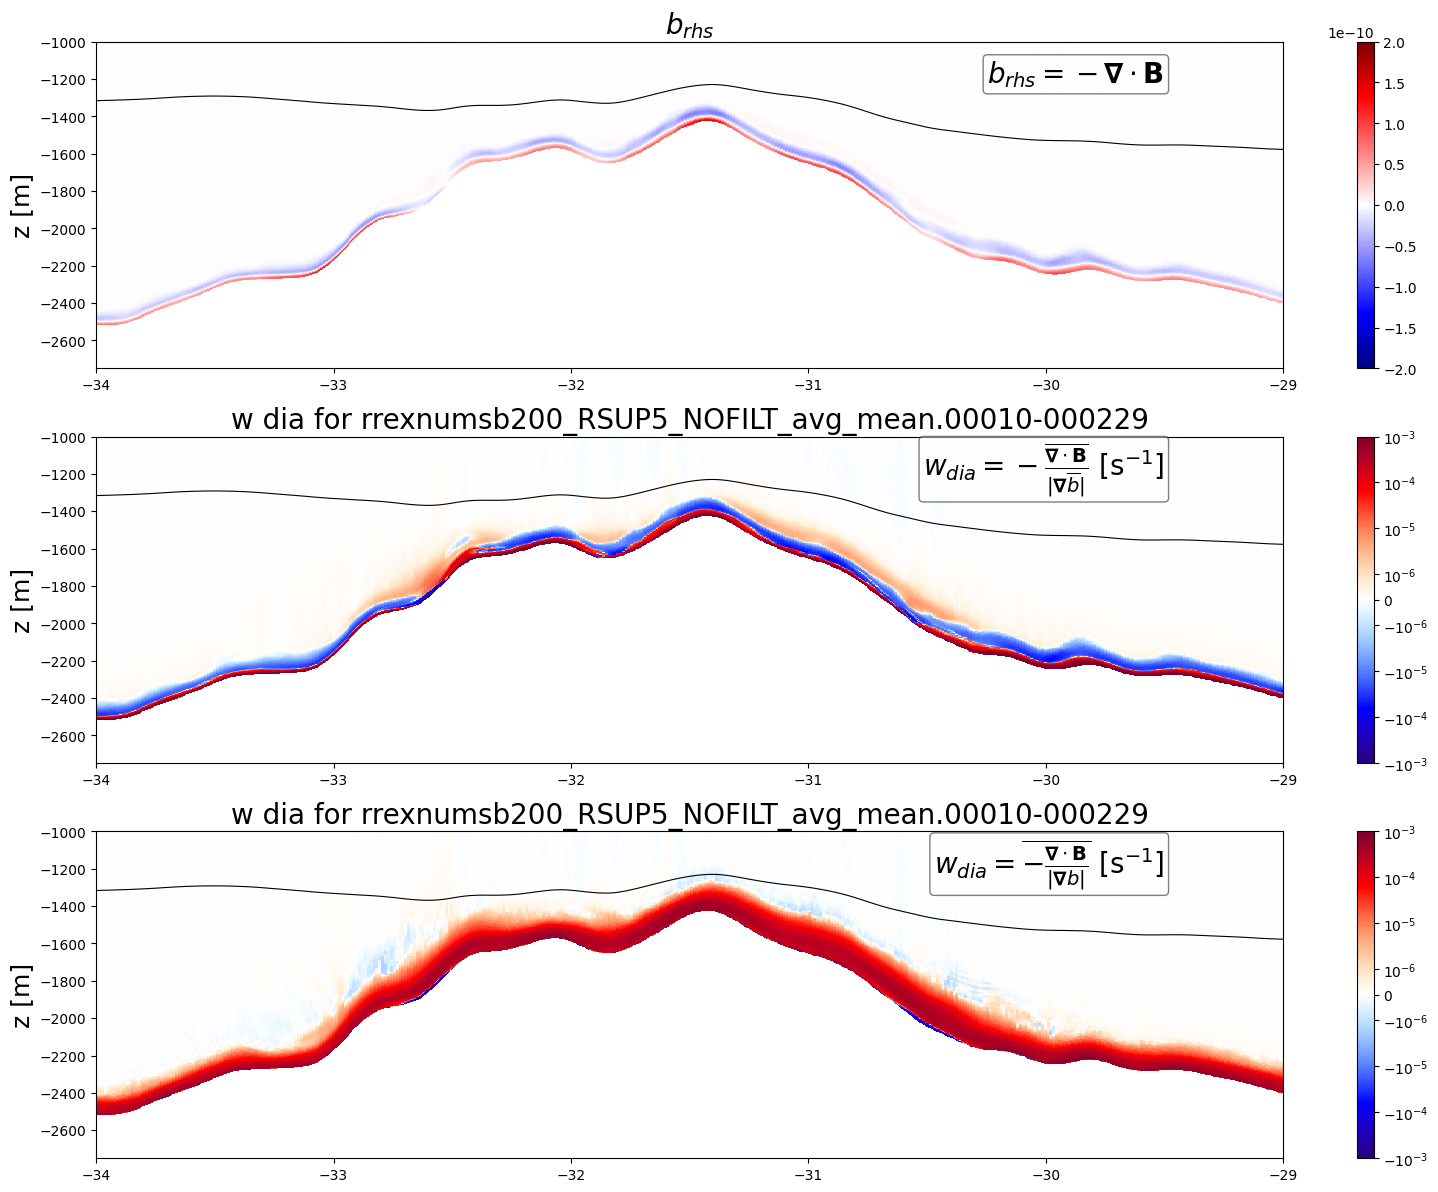

In [10]:
####


############################################
def rho_grad_neutral(T,S,z_r,z_w,rho0,pm,pn, harmo=False):
    
    [dbdx,dbdy,dbdz] = toolsF.rho_grad(T,S,z_r,z_w,rho0,pm,pn)
    
    dzdx = tools.diffx(z_r,pm)
    dzdy = tools.diffy(z_r,pn)
        
    if harmo:
        dbdz = w2rho(dbdz)
        dbdx = u2rho(dbdx) - dbdz * u2rho(dzdx)
        dbdy = v2rho(dbdy) - dbdz * v2rho(dzdy)
    else:
        dbdz = 0.5* (dbdz[:,:,1:] + dbdz[:,:,:-1])  
        dbdx = tools.u2rho(dbdx) - dbdz * tools.u2rho(dzdx)
        dbdy = tools.v2rho(dbdy) - dbdz * tools.v2rho(dzdy)
    
    return [dbdx,dbdy,dbdz]


####

wdia_online =  section(var('wdia',simul_wdia).data)

####

[z_r,z_w] = tools.get_depths(simul);
T = var('temp',simul).data; S = var('salt',simul).data

####

[dbdx,dbdy,dbdz] = rho_grad_neutral(T,S,z_r,z_w,simul.rho0,simul.pm,simul.pn)
dbuoy2_neutral = np.sqrt( dbdx**2 + dbdy**2 + dbdz**2 )

wdia_mean = section( var('b_rhs',simul_wdia).data / dbuoy2_neutral )


###################

zoom = True
if zoom: 
    xlim = [-34, -29]
    zlim = [-2750,-1000]
else:
    xlim = None
    zlim = None
    
############################

fig = plt.figure(figsize=(16.0,12))
fig.set_tight_layout(1.)

###################

bscale = 0.2e-9
wdia_scale = np.arange(-1,1.01,0.01)*0.01e-1

ax1 = plt.subplot(3,1,1);
panel(ax1,b_rhs,levels=np.arange(-1,1.01,0.01)*bscale,\
      title='$b_{rhs}$', varname ='b',varlabel=r'$b_{rhs} = - \mathbf{\nabla} \cdot \mathbf{B}$',xlim=xlim, zlim=zlim)

ax1 = plt.subplot(3,1,2);
panel(ax1,wdia_mean,levels=wdia_scale,\
      title='w dia for '+ title, varname ='wdia',\
      varlabel=r'$w_{dia}=  -  \frac{\overline{\mathbf{\nabla} \cdot \mathbf{B}}}{\left| \mathbf{\nabla} \overline{b } \right|} $ [s$^{-1}$]',\
      xlim=xlim, zlim=zlim,low=1e-6)


ax1 = plt.subplot(3,1,3);
panel(ax1,wdia_online,levels=wdia_scale,\
      title='w dia for '+ title, varname ='wdia',\
      varlabel=r'$w_{dia}=   \overline{ -\frac{\mathbf{\nabla} \cdot \mathbf{B}}{\left| \mathbf{\nabla} b  \right|} }$ [s$^{-1}$]',\
      xlim=xlim, zlim=zlim,low=1e-6)



py.savefig(fifig + 'wdia_brhs__' +simul.simul + '.png', dpi=200,bbox_inches='tight');



In [11]:
############################################
def compute_tsadv(T,u,v, z_r,z_w, f,g,rho0,pm,pn, newadv=True):
    '''
    check alternate formulation for r.h.s. of tracer equation
    '''
    ##########################

    if newadv:
        advx = tools.u2rho(u * tools.diffx(T,pm))
        advy = tools.v2rho(v * tools.diffy(T,pn))

        try:
            omega = var('omega',simul).data
        except:
            print('no omega in file, computing')
            omega = toolsF.get_omega(u,v,z_r,z_w,pm,pn)
        advz = omega[:,:,1:-1] * (T[:,:,1:]-T[:,:,:-1])/(z_r[:,:,1:]-z_r[:,:,:-1])
        advz = tools.vinterp(advz,z_r,z_w[:,:,1:-1],z_r)

    else:
        advx = tools.u2rho(u * diffxi(T,pm,z_r,z_w))
        advy = tools.v2rho(v * diffeta(T,pn,z_r,z_w))

        try:
            omega = var('w',simul).data
        except:
            print('no w in file, computing')
            omega = toolsF.get_wvlcty(u,v,z_r,z_w,pm,pn)
        advz = omega[:,:,:] * tools.diffz_sig(T,z_r,z_w)

    return advx + advy, advz

###########################

def get_brhs(simul,T,S, t_rhs, s_rhs,z_r,z_w, nlbrhs = False):

    if 'NONLIN_EOS' in simul.cpp:
        #[alpha,beta] = var.alphabeta(T,S,simul.rho0);
        [alpha,beta] = toolsF.alfabeta_3d(T,S,z_r,z_w,simul.rho0);

    else:
        print('using LIN_EOS')
        [alpha,beta] = [simul.Tcoef,simul.Scoef]/simul.rho0

    if nlbrhs:
        b_rhs = nonlin_brhs(T,S, t_rhs, s_rhs, simul.rho0, simul.g)
    else:
        b_rhs = simul.g * (alpha * t_rhs - beta * s_rhs)  # rho-rho grid


    return b_rhs

###########################




t=var('temp',simul,depths=[0])
[TXadv,TYadv,TVadv] = t.get_tracer_advection(simul); del t

b_adv_mean_save = get_brhs(simul,T[:,:,:],S[:,:,:],\
                                TXadv[:,:,:,0]+TYadv[:,:,:,0]+TVadv[:,:,:,0],\
                                TXadv[:,:,:,1]+TYadv[:,:,:,1]+TVadv[:,:,:,1],z_r,z_w)

b_adv_mean = section(b_adv_mean_save); del TXadv,TYadv,TVadv

###########################

u = var('u',simul).data; v = var('v',simul).data
buoy = - simul.g * var('rho1',simul).data / simul.rho0
[t_rhs_hadv,t_rhs_vadv] = compute_tsadv(buoy,u,v, z_r,z_w, simul.f,simul.g,simul.rho0,simul.pm, simul.pn)

b_adv_mean_2_save = - t_rhs_hadv- t_rhs_vadv
b_adv_mean_2 = -section(t_rhs_hadv+t_rhs_vadv); 

del buoy, t_rhs_hadv, t_rhs_vadv


no omega in file, computing


/tmp/ipykernel_890923/1901541982.py:32: RuntimeWarning: Mean of empty slice
  return np.nanmean(var[:,1:-1,:],axis=1);


no omega in file, computing


/tmp/ipykernel_890923/1901541982.py:110: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\


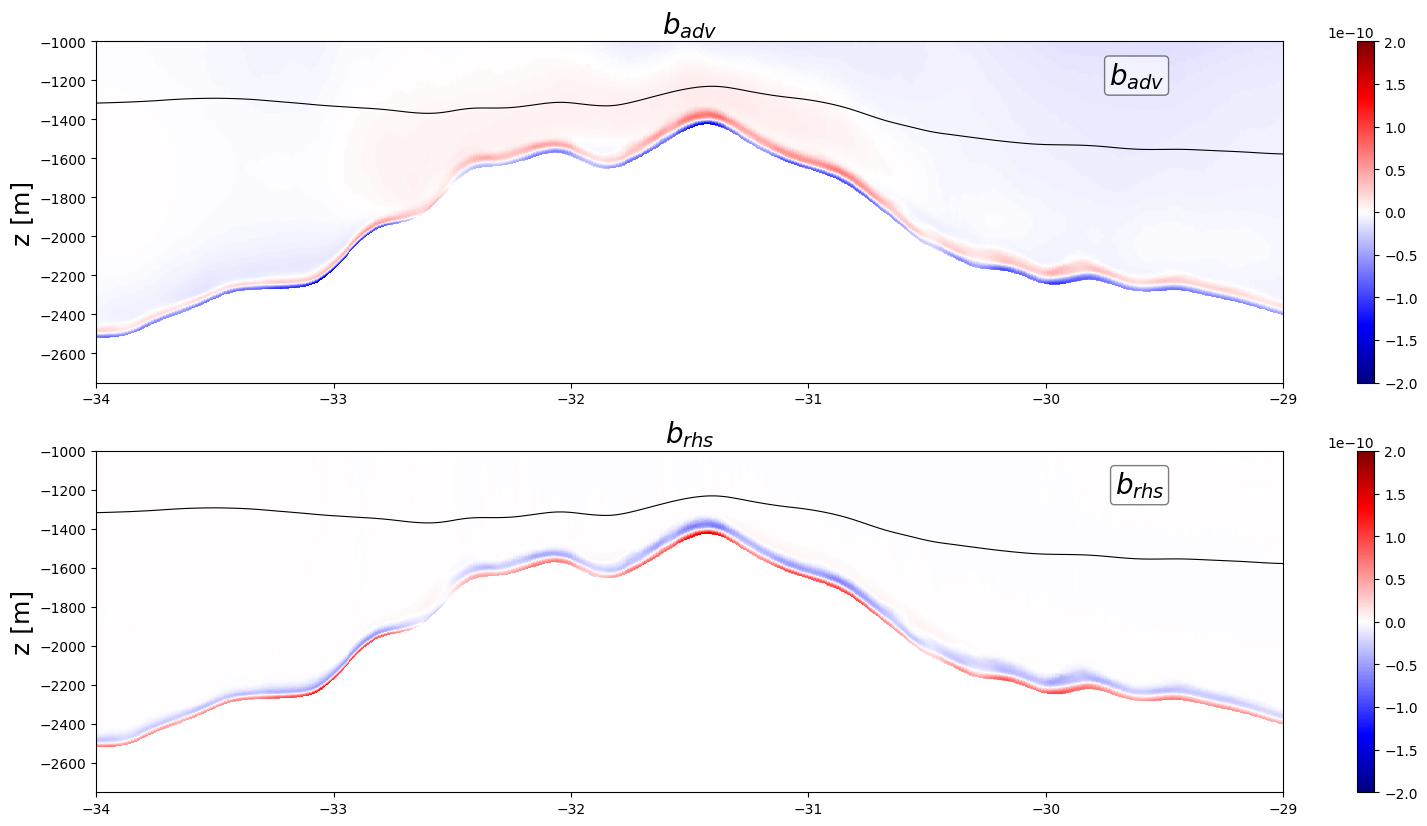

In [12]:
zoom = True
if zoom: 
    xlim = [-34, -29]
    zlim = [-2750,-1000]
else:
    xlim = None
    zlim = None
    
    
############################

fig = plt.figure(figsize=(16.0,16))
fig.set_tight_layout(1.)

###################

bscale = 0.2e-9
wdia_scale = np.arange(-1,1.01,0.01)*0.5e-1
'''
ax1 = plt.subplot(4,1,1);
panel(ax1,b_rate,levels=np.arange(-1,1.01,0.01)*bscale,\
      title=r'$b_{rate}$', varname ='b',varlabel=r'$b_{rate}$',xlim=xlim, zlim=zlim)
'''

#ax1 = plt.subplot(6,1,4);
#panel(ax1,b_adv_mean,levels=np.arange(-1,1.01,0.01)*bscale,\
#      title='b_adv mean', varname ='b',xlim=xlim, zlim=zlim)

ax1 = plt.subplot(4,1,2);
panel(ax1,b_adv ,levels=np.arange(-1,1.01,0.01)*bscale,\
      title='$b_{adv}$', varname ='b',varlabel=r'$b_{adv}$',xlim=xlim, zlim=zlim)

ax1 = plt.subplot(4,1,3);
panel(ax1,b_rhs,levels=np.arange(-1,1.01,0.01)*bscale,\
      title='$b_{rhs}$', varname ='b',varlabel=r'$b_{rhs}$',xlim=xlim, zlim=zlim)
'''
ax1 = plt.subplot(5,1,1);
panel(ax1,w_online,levels=np.linspace(-1e-3, 1e-3,10),\
      title='w for '+ title, varname ='w',varlabel=r'$w$ [m s$^{-1}$]',xlim=xlim, zlim=zlim)

ax1 = plt.subplot(5,1,2);
panel(ax1,wdia_online,levels=wdia_scale,\
      title='w dia for '+ title, varname ='wdia',varlabel=r'$K_{eff}$',xlim=xlim, zlim=zlim,low=1e-4)
'''


py.savefig(fifig + 'buoyancy_balance_' +simul.simul + '.png', dpi=200,bbox_inches='tight');



/tmp/ipykernel_890923/1901541982.py:110: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\
/tmp/ipykernel_890923/1901541982.py:102: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\


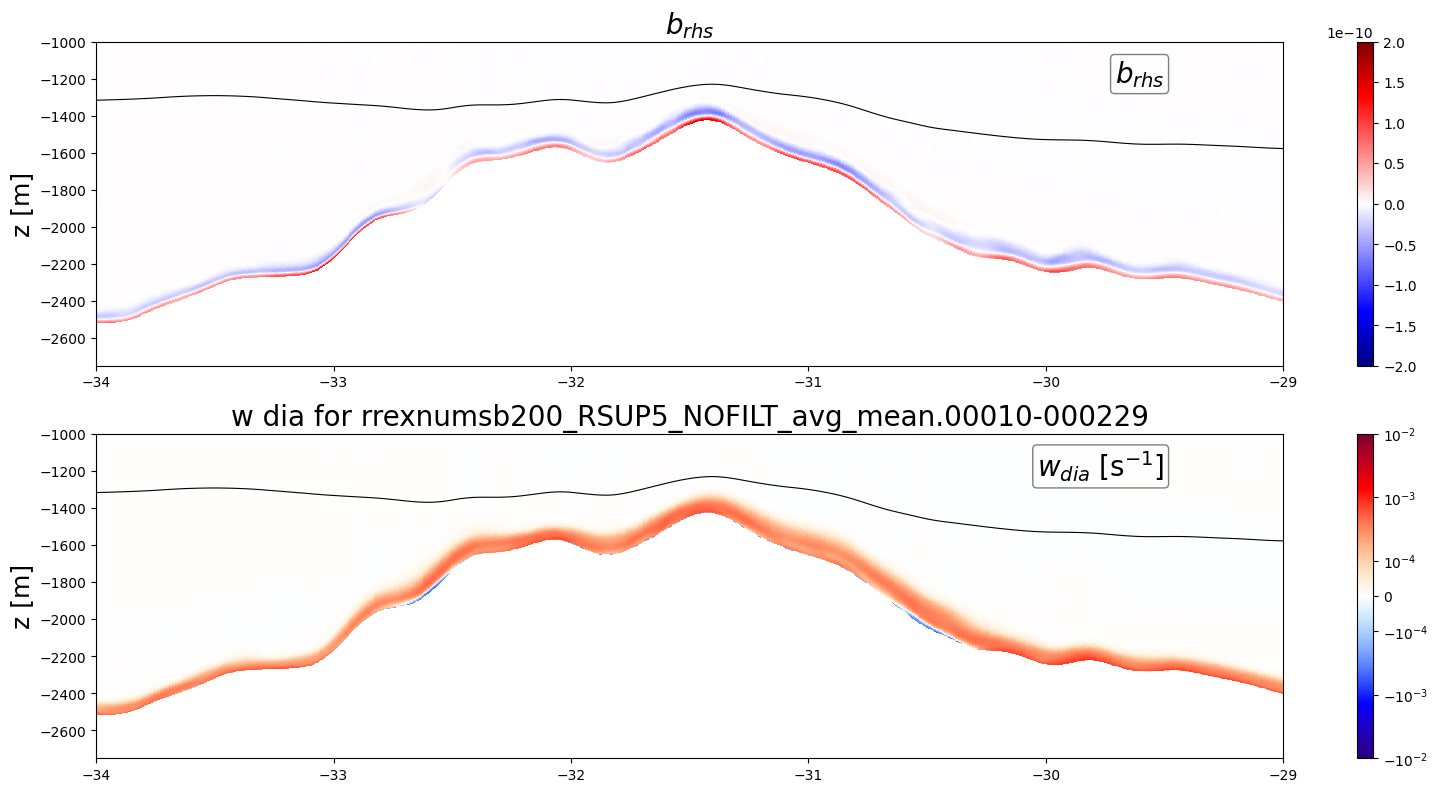

In [13]:
zoom = True
if zoom: 
    xlim = [-34, -29]
    zlim = [-2750,-1000]
else:
    xlim = None
    zlim = None
    
    
############################

fig = plt.figure(figsize=(16.0,8))
fig.set_tight_layout(1.)

###################

bscale = 0.2e-9
wdia_scale = np.arange(-1,1.01,0.01)*0.1e-1

ax1 = plt.subplot(2,1,1);
panel(ax1,b_rhs,levels=np.arange(-1,1.01,0.01)*bscale,\
      title='$b_{rhs}$', varname ='b',varlabel=r'$b_{rhs}$',xlim=xlim, zlim=zlim)

ax1 = plt.subplot(2,1,2);
panel(ax1,wdia_online,levels=wdia_scale,\
      title='w dia for '+ title, varname ='wdia',varlabel=r'$w_{dia}$ [s$^{-1}$]',xlim=xlim, zlim=zlim,low=1e-4)


py.savefig(fifig + 'wdia_brhs__' +simul.simul + '.png', dpi=200,bbox_inches='tight');


/tmp/ipykernel_890923/1901541982.py:110: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lat_sec_x, z_r_sec_x,\


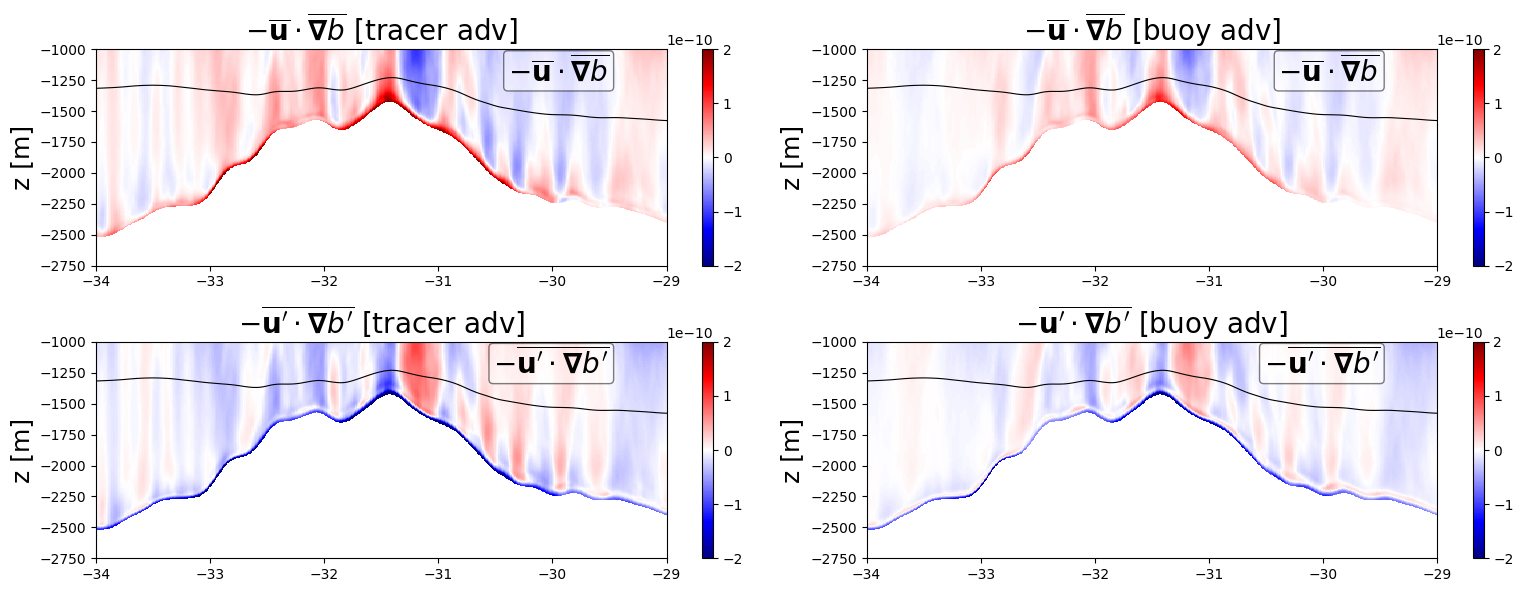

In [25]:
############################

fig = plt.figure(figsize=(16.0,6.0))
fig.set_tight_layout(1.)

###################



varlabel=r'$-\overline{\mathbf{u}} \cdot \overline{\mathbf{\nabla} b}}$'

ax1 = plt.subplot(2,2,1);
panel(ax1,b_adv_mean,levels=np.arange(-1,1.01,0.01)*bscale,\
      title=varlabel + ' [tracer adv]', varname ='b',varlabel=varlabel,xlim=xlim, zlim=zlim)

varlabel=r'$-\overline{\mathbf{u}} \cdot \overline{\mathbf{\nabla} b}}$'

ax1 = plt.subplot(2,2,2);
panel(ax1,b_adv_mean_2,levels=np.arange(-1,1.01,0.01)*bscale,\
      title=varlabel+ ' [buoy adv]', varname ='b',varlabel=varlabel,xlim=xlim, zlim=zlim)

varlabel=r'$-\overline{\mathbf{u^\prime} \cdot \mathbf{\nabla} b^\prime}$'

ax1 = plt.subplot(2,2,3);
panel(ax1,b_adv - b_adv_mean,levels=np.arange(-1,1.01,0.01)*bscale,\
      title=varlabel+ ' [tracer adv]', varname ='b',varlabel=varlabel,xlim=xlim, zlim=zlim)
varlabel=r'$-\overline{\mathbf{u^\prime} \cdot \mathbf{\nabla} b^\prime}$'

ax1 = plt.subplot(2,2,4);
panel(ax1,b_adv - b_adv_mean_2,levels=np.arange(-1,1.01,0.01)*bscale,\
      title=varlabel+ ' [buoy adv]', varname ='b',varlabel=varlabel,xlim=xlim, zlim=zlim)


py.savefig(fifig + 'buoyancy_mean_and_eddy_' +simul.simul + '.png', dpi=200,bbox_inches='tight');


## Vertical profiles

In [28]:

##################

def profile(var):
    
    [nx,ny,nz] = var.shape
    
    return np.nanmean(var.reshape( nx*ny, nz),axis=0);



##################

def profiles(var, conds):
    
    [nx,ny,nz] = var.shape
    var_m = []
    
    for cond in conds:
        var_m.append([np.nanmean(var.reshape( nx*ny, nz)[cond],axis=0),\
                      np.nanpercentile(var.reshape( nx*ny, nz)[cond],50,axis=0),\
                      np.nanpercentile(var.reshape( nx*ny, nz)[cond],10,axis=0),\
                      np.nanpercentile(var.reshape( nx*ny, nz)[cond],90,axis=0)])

    return var_m


##################

[nx,ny] = simul_zoom.topo.shape

#####################

topo = simul_zoom.topo.reshape( nx*ny )
mask = simul_zoom.mask.reshape( nx*ny )
lat = simul_zoom.y.reshape( nx*ny )
lon = simul_zoom.x.reshape( nx*ny )
wbot =  var('w',simul_zoom, depths=[1]).data.reshape( nx*ny )
bvf =  var('bvf',simul_zoom, depths=[1]).data.reshape( nx*ny )

#######
# build several conditions

conds = []
titles = []

###
titles.append('all')
conds.append( mask>0 )
print(np.sum(conds[0]))

###
titles.append('wbot<0,topo<2000,bvf>0')
conds.append( np.logical_and.reduce( (mask>0,wbot<0,topo<2000,bvf>0) ) )
print(np.sum(conds[1]))
    
###
titles.append('wbot>0,topo<2000,bvf>0')
conds.append( np.logical_and.reduce( (mask>0,wbot>0,topo<2000,bvf>0) ) )
print(np.sum(conds[2])) 

###
titles.append('around 30.6W,58.8N')
# Pick a mooring
lat_mooring = 58.8
lon_mooring = -30.6
dl=0.01
conds.append( np.logical_and.reduce( (lon>lon_mooring-dl,lon<lon_mooring+dl,\
                                      lat>lat_mooring-dl,lat<lat_mooring+dl) ) )
print(np.sum(conds[3])) 

###
titles.append('topo<2000,bvf<0')
conds.append( np.logical_and.reduce( (mask>0,topo<2000,bvf<0) ) )
print(np.sum(conds[4])) 

    

320000
46371
20838
3
10219


In [29]:


######################

b_rate_z =  profiles(var('b_rate',simul_wdia).data,conds)
b_adv_z =  profiles(var('b_adv',simul_wdia).data,conds)
b_rhs_z =  profiles(var('b_rhs',simul_wdia).data,conds)
b_adv_mean_z = profiles(b_adv_mean_save,conds); 

######################

bvf_z = profiles(var('bvf',simul).data,conds); 

######################

diffusivity_online_z = profiles(var('diffusivity',simul_wdia).data,conds)
AKt_z = profiles(rho2w(var('AKt',simul).data),conds)

#wdia_online_z =  profiles(var('wdia',simul_wdia).data,conds)
w_online_z =  profiles(var('w',simul).data,conds)

[z_r,z_w] = tools.get_depths(simul_zoom)
z_z = profile(z_r); 
zw_z = profile(z_w); 

z_z -= np.min(zw_z)
zw_z -= np.min(zw_z)

del z_r,z_w

######################


In [30]:



############################

def panel_vert(ax, z, myvar, style = '-', color='k',\
               varlabel=None,label=None, log=False, ylabel=True):
    
    if log:
        plt.semilogx(myvar,z, style, linewidth = 2., label=label, color=color)
    else:
        plt.plot(myvar,z, style, linewidth = 2., label=label, color=color)

    plt.ylim([0,1000])
    
    if ylabel:
        plt.ylabel(r'height [m]',fontsize=18);  #plt.ylim([-4000, -1000]);
        
    
    
    if varlabel!=None: 
        color = 'w'; box = 'round,pad=0.15'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=0.5)
        ax.text(0.9,0.9,varlabel, fontsize=20,\
                              horizontalalignment='right', verticalalignment='center',\
                              bbox=props, transform=ax.transAxes)
    else:
        plt.legend(fontsize=12)
        
############################
'''
fig = plt.figure(figsize=(8.0,3.0))
fig.set_tight_layout(1.)

###################

ax1 = plt.subplot(1,4,3);
panel_vert(ax1,z_z,wdia_online_z,varlabel=r'$w_{dia}$ [s$^{-1}$]', ylabel=False)


###################

ax1 = plt.subplot(1,4,2);
panel_vert(ax1,z_z,w_online_z,varlabel=r'$w$ [m s$^{-1}$]', ylabel=False)


###################

ax1 = plt.subplot(1,4,1);
panel_vert(ax1,z_z,diffusivity_online_z, style ='--',varlabel=r'$K_{eff}$', log=True)
panel_vert(ax1,z_z,AKt_z,varlabel=r'$K_{KPP}$', log=True)
#plt.ylim([-4000,-3000])

############################

#py.savefig(fifig + 'mixing_and_wdia' +simul.simul + '.png', dpi=200,bbox_inches='tight');
'''

"\nfig = plt.figure(figsize=(8.0,3.0))\nfig.set_tight_layout(1.)\n\n###################\n\nax1 = plt.subplot(1,4,3);\npanel_vert(ax1,z_z,wdia_online_z,varlabel=r'$w_{dia}$ [s$^{-1}$]', ylabel=False)\n\n\n###################\n\nax1 = plt.subplot(1,4,2);\npanel_vert(ax1,z_z,w_online_z,varlabel=r'$w$ [m s$^{-1}$]', ylabel=False)\n\n\n###################\n\nax1 = plt.subplot(1,4,1);\npanel_vert(ax1,z_z,diffusivity_online_z, style ='--',varlabel=r'$K_{eff}$', log=True)\npanel_vert(ax1,z_z,AKt_z,varlabel=r'$K_{KPP}$', log=True)\n#plt.ylim([-4000,-3000])\n\n############################\n\n#py.savefig(fifig + 'mixing_and_wdia' +simul.simul + '.png', dpi=200,bbox_inches='tight');\n"

In [31]:
'''
############################

fig = plt.figure(figsize=(14.0,8.0))
fig.set_tight_layout(1.)



###################

ax1 = plt.subplot(2,4,1);
panel_vert(ax1,z_z,diffusivity_online_z, style ='--',varlabel=r'$K_{eff}$', log=True)
panel_vert(ax1,z_z,AKt_z,varlabel=r'$K_{KPP}$', log=True)
#plt.ylim([-4000,-3000])

###################

ax1 = plt.subplot(2,4,2);
panel_vert(ax1,z_z,w_online_z,varlabel=r'$w$ [m s$^{-1}$]', ylabel=False)

###################

###################

ax1 = plt.subplot(2,4,5);
panel_vert(ax1,z_z,b_adv_z,varlabel=r'$b_{adv}$', ylabel=False)
plt.xlim([-2e-10,2e-10])

ax1 = plt.subplot(2,4,6);
panel_vert(ax1,z_z,b_rhs_z,varlabel=r'$b_{rhs}$', ylabel=False)
plt.xlim([-2e-10,2e-10])

ax1 = plt.subplot(2,4,7);
panel_vert(ax1,z_z,b_adv_mean_z,varlabel=r'$-\overline{\mathbf{u}} \cdot \overline{\mathbf{\nabla} b}}$', ylabel=False)
plt.xlim([-2e-10,2e-10])

ax1 = plt.subplot(2,4,8);
panel_vert(ax1,z_z,b_adv_z - b_adv_mean_z,varlabel=r'$-\overline{\mathbf{u^\prime} \cdot \mathbf{\nabla} b^\prime}$', ylabel=False)
plt.xlim([-2e-10,2e-10])

############################

#py.savefig(fifig + 'mixing_and_wdia' +simul.simul + '.png', dpi=200,bbox_inches='tight');
'''

"\n############################\n\nfig = plt.figure(figsize=(14.0,8.0))\nfig.set_tight_layout(1.)\n\n\n\n###################\n\nax1 = plt.subplot(2,4,1);\npanel_vert(ax1,z_z,diffusivity_online_z, style ='--',varlabel=r'$K_{eff}$', log=True)\npanel_vert(ax1,z_z,AKt_z,varlabel=r'$K_{KPP}$', log=True)\n#plt.ylim([-4000,-3000])\n\n###################\n\nax1 = plt.subplot(2,4,2);\npanel_vert(ax1,z_z,w_online_z,varlabel=r'$w$ [m s$^{-1}$]', ylabel=False)\n\n###################\n\n###################\n\nax1 = plt.subplot(2,4,5);\npanel_vert(ax1,z_z,b_adv_z,varlabel=r'$b_{adv}$', ylabel=False)\nplt.xlim([-2e-10,2e-10])\n\nax1 = plt.subplot(2,4,6);\npanel_vert(ax1,z_z,b_rhs_z,varlabel=r'$b_{rhs}$', ylabel=False)\nplt.xlim([-2e-10,2e-10])\n\nax1 = plt.subplot(2,4,7);\npanel_vert(ax1,z_z,b_adv_mean_z,varlabel=r'$-\\overline{\\mathbf{u}} \\cdot \\overline{\\mathbf{\nabla} b}}$', ylabel=False)\nplt.xlim([-2e-10,2e-10])\n\nax1 = plt.subplot(2,4,8);\npanel_vert(ax1,z_z,b_adv_z - b_adv_mean_z,varlabel

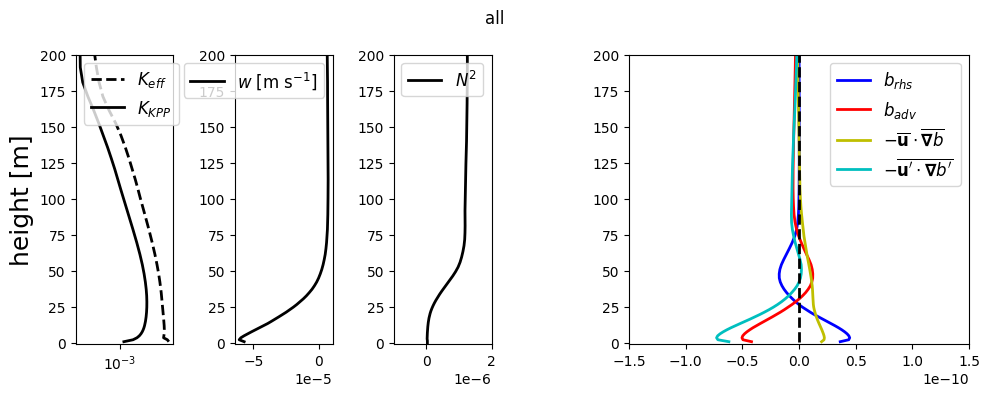

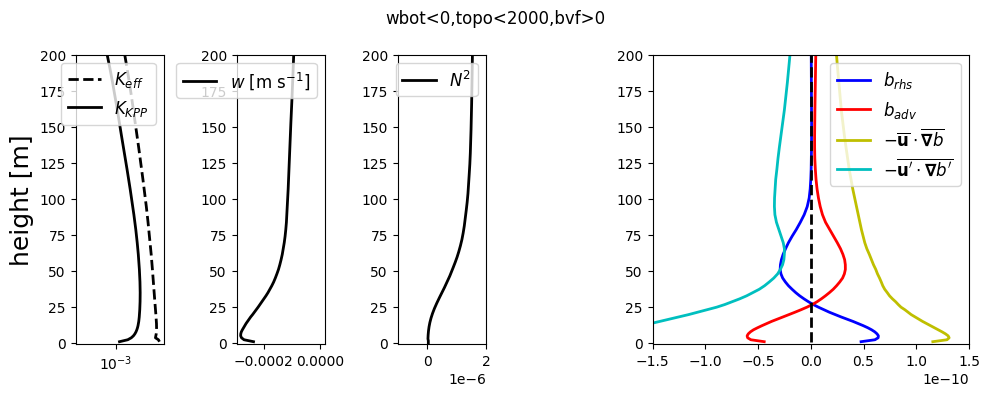

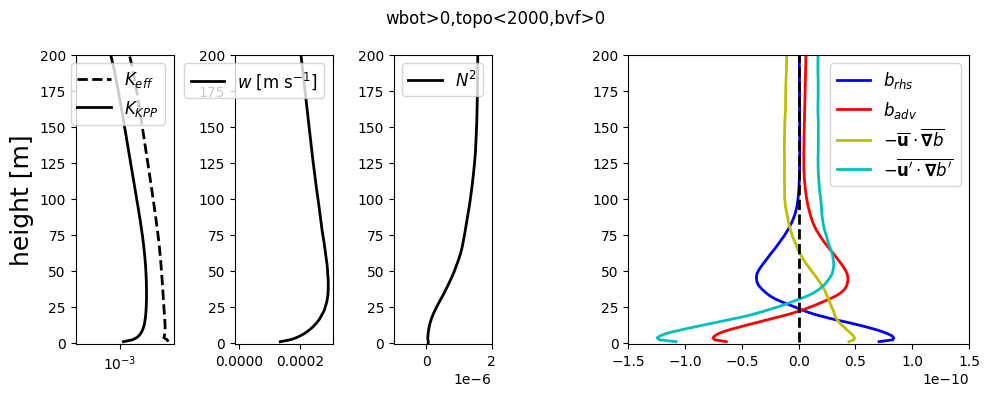

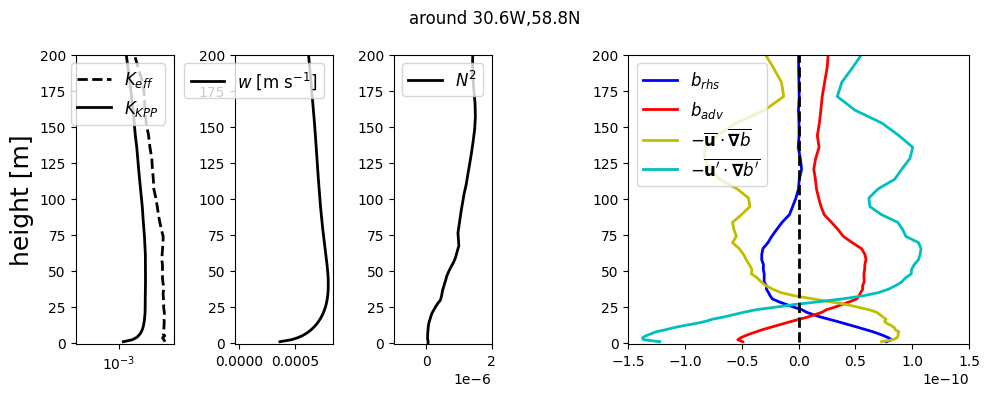

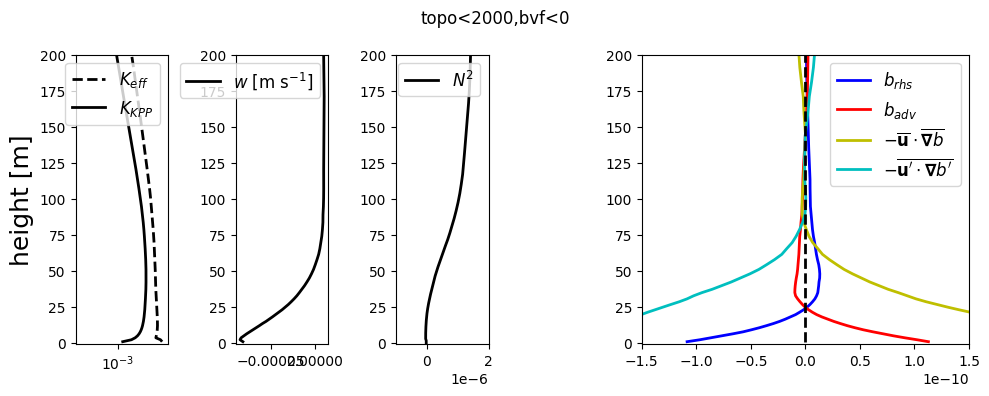

In [32]:


for i in range(len(conds)):
    
############################

    fig = plt.figure(figsize=(10.0,4.0))
    fig.set_tight_layout(1.)

    plt.suptitle(titles[i])
    ax1 = plt.subplot(1,6,1);
    panel_vert(ax1,z_z,diffusivity_online_z[i][1], style ='--',label=r'$K_{eff}$', log=True)
    panel_vert(ax1,z_z,AKt_z[i][1][1:-1],label=r'$K_{KPP}$', log=True)
    plt.ylim([-1,200])

    ax1 = plt.subplot(1,6,2);
    panel_vert(ax1,z_z,w_online_z[i][1],label=r'$w$ [m s$^{-1}$]', ylabel=False)
    plt.ylim([-1,200])
    
    ax1 = plt.subplot(1,6,3);
    panel_vert(ax1,zw_z,bvf_z[i][1],label=r'$N^2$', ylabel=False)
    plt.ylim([-1,200]); plt.xlim([-1e-6,2e-6])


    ax1 = plt.subplot(1,2,2);
    panel_vert(ax1,z_z,b_rhs_z[i][1],label=r'$b_{rhs}$',color='b',ylabel=False)
    panel_vert(ax1,z_z,b_adv_z[i][1],label=r'$b_{adv}$',color='r',ylabel=False)

    panel_vert(ax1,z_z,b_adv_mean_z[i][1],\
               label=r'$-\overline{\mathbf{u}} \cdot \overline{\mathbf{\nabla} b}}$',\
               color='y',ylabel=False)
    panel_vert(ax1,z_z,b_adv_z[i][1] - b_adv_mean_z[i][1],\
               label=r'$-\overline{\mathbf{u^\prime} \cdot \mathbf{\nabla} b^\prime}$',\
               color='c',ylabel=False)
    panel_vert(ax1,z_z,b_adv_z[i][1]*0.,'--',ylabel=False)
    plt.ylim([-1,200])
    plt.xlim([-1.5e-10,1.5e-10])





Text(0.5, 1.0, 'N2 - sig=25')

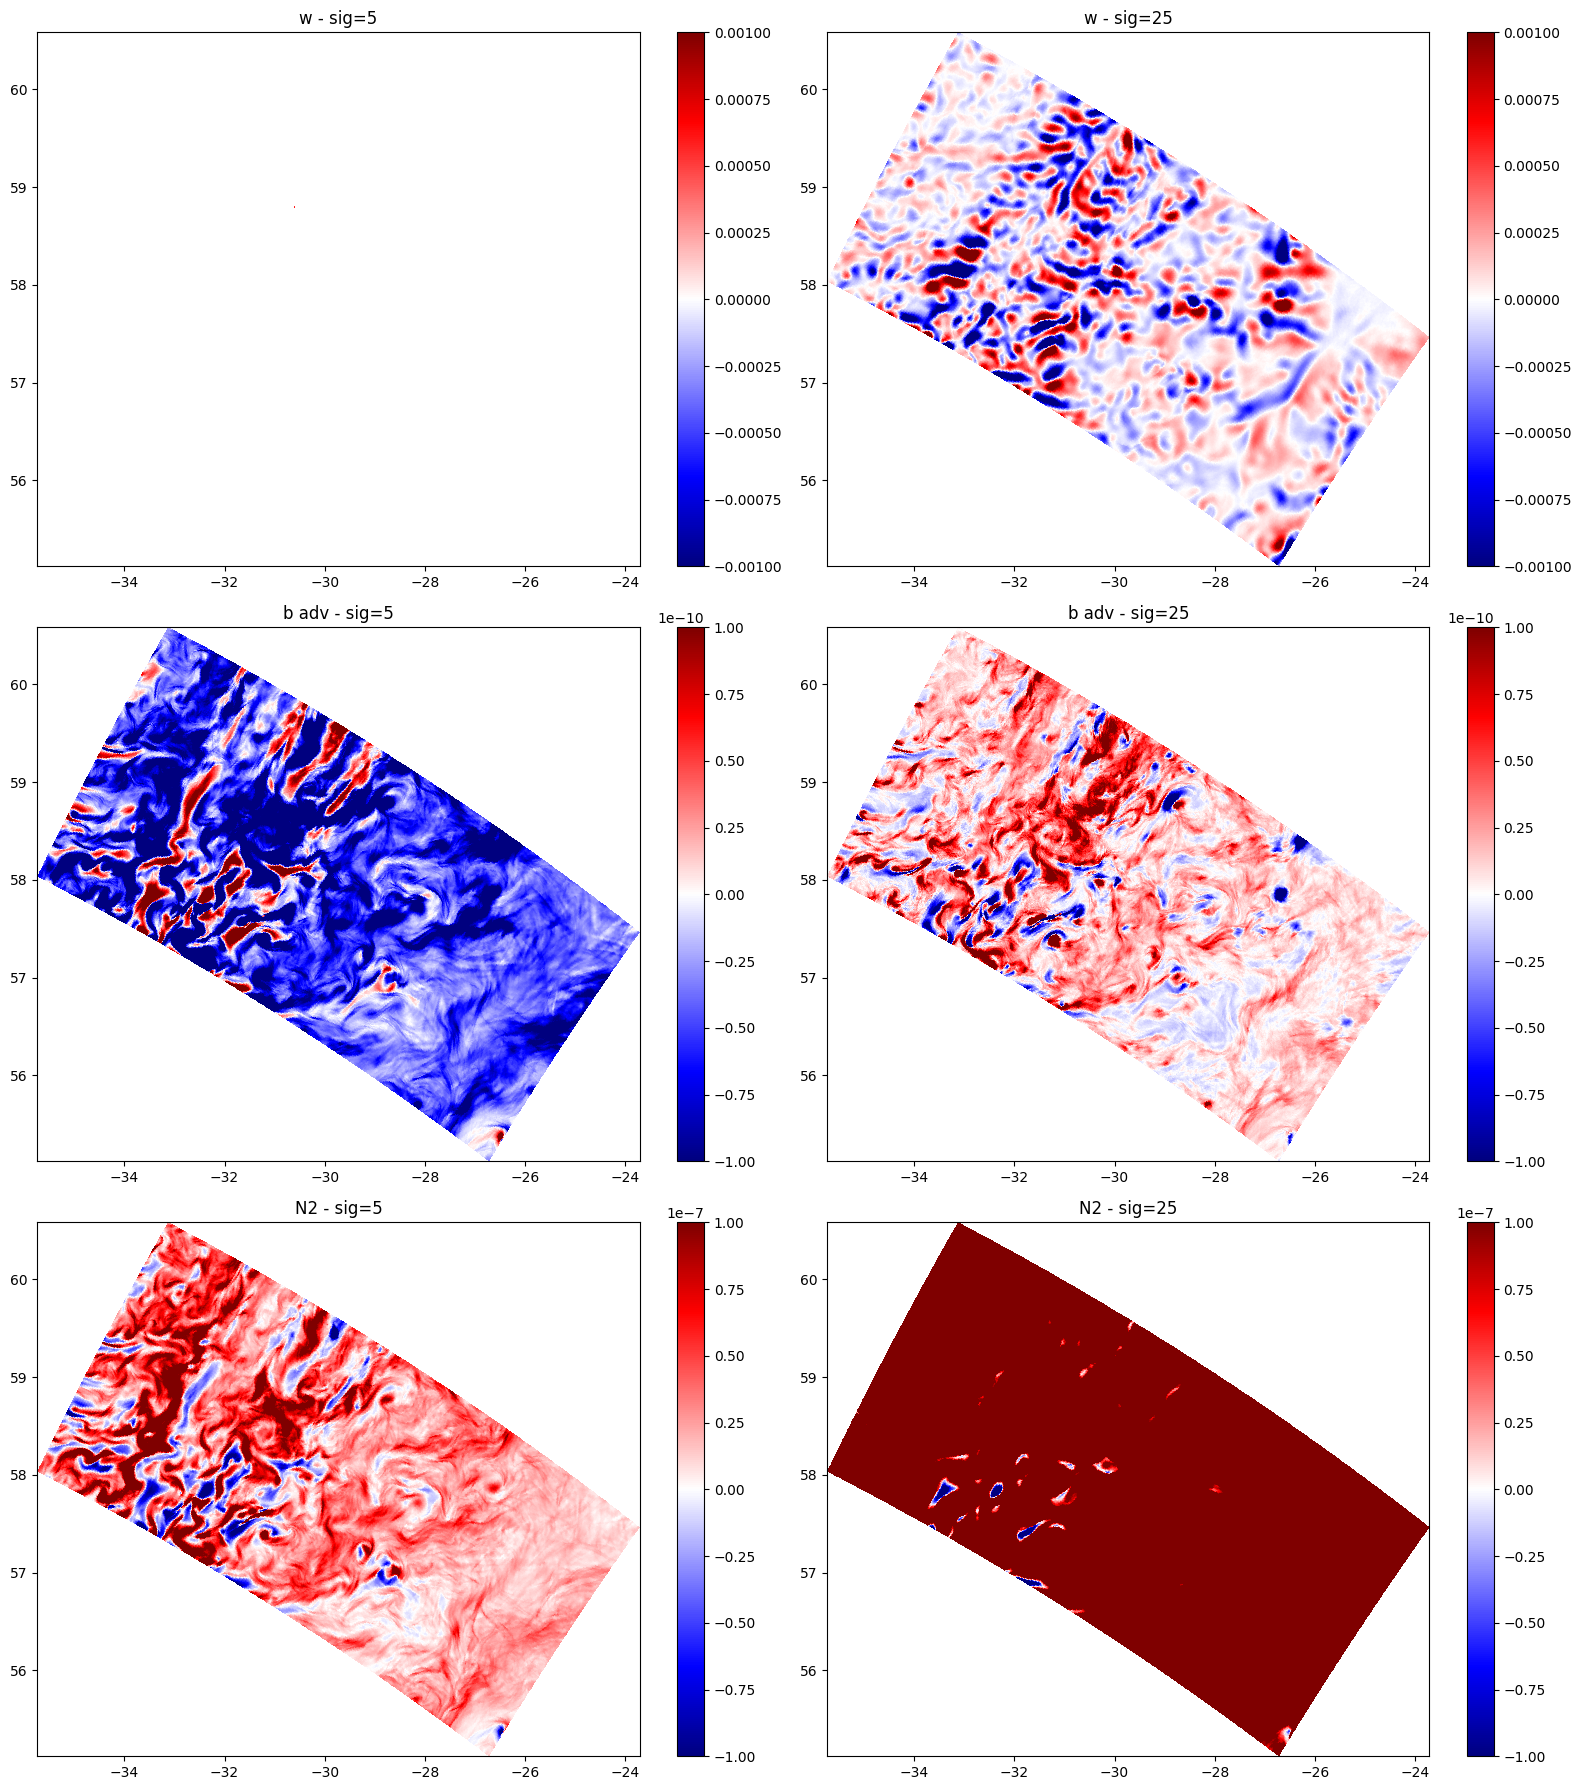

In [20]:

w_bot = var('w', simul, depths=[5]).data
w_up = var('w', simul, depths=[25]).data

b_adv_bot = var('b_adv',simul_wdia, depths=[5]).data
b_adv_up = var('b_adv',simul_wdia, depths=[25]).data

bvf_bot = var('bvf',simul, depths=[5]).data
bvf_up = var('bvf',simul, depths=[25]).data


w_bot[np.logical_not(np.reshape(conds[3],(nx,ny)))] = np.nan


############################

fig = plt.figure(figsize=(16.0,18.0))
fig.set_tight_layout(1.)

###################

my_cmap= plot.ncview_colormap('blue_red')

ax1 = plt.subplot(3,2,1);
plt.pcolormesh(simul_zoom.x,simul_zoom.y,\
               w_bot,\
               vmin=-1e-3,vmax=1e-3,cmap=my_cmap); 
plt.colorbar()


#plt.contour(simul_zoom.x,simul_zoom.y,wbot,[1e-4])
plt.title('w - sig=5')

ax1 = plt.subplot(3,2,2);
plt.pcolormesh(simul_zoom.x,simul_zoom.y,\
               w_up,\
               vmin=-1e-3,vmax=1e-3,cmap=my_cmap); 
plt.colorbar()

#plt.contour(simul_zoom.x,simul_zoom.y,wbot,[1e-4])
plt.title('w - sig=25')

ax1 = plt.subplot(3,2,3);
plt.pcolormesh(simul_zoom.x,simul_zoom.y,\
               b_adv_bot,\
               vmin=-1e-10,vmax=1e-10,cmap=my_cmap);
plt.colorbar()
#plt.contour(simul_zoom.x,simul_zoom.y,wbot,[1e-4])
plt.title('b adv - sig=5')


ax1 = plt.subplot(3,2,4);
plt.pcolormesh(simul_zoom.x,simul_zoom.y,\
               b_adv_up,\
               vmin=-1e-10,vmax=1e-10,cmap=my_cmap);
plt.colorbar()
#plt.contour(simul_zoom.x,simul_zoom.y,wbot,[1e-4])
plt.title('b adv - sig=25')



ax1 = plt.subplot(3,2,5);
plt.pcolormesh(simul_zoom.x,simul_zoom.y,\
               bvf_bot,\
               vmin=-1e-7,vmax=1e-7,cmap=my_cmap);
plt.colorbar()

#plt.contour(simul_zoom.x,simul_zoom.y,wbot,[1e-4])
plt.title('N2 - sig=5')


ax1 = plt.subplot(3,2,6);
plt.pcolormesh(simul_zoom.x,simul_zoom.y,\
               bvf_up,\
               vmin=-1e-7,vmax=1e-7,cmap=my_cmap);
plt.colorbar()


#plt.contour(simul_zoom.x,simul_zoom.y,wbot,[1e-4])
plt.title('N2 - sig=25')


####


In [21]:
conds[0]

array([ True,  True,  True, ...,  True,  True,  True])